<a href="https://colab.research.google.com/github/vasumaha/aarogya/blob/master/Diamond_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
#import lib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
#import data set
df=pd.read_csv('/content/diamonds.csv')


In [3]:
#size and variables
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53806 non-null  float64
 6   table       53827 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53854 non-null  float64
 9   y           53840 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 12.6 MB


In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
df.isnull().sum()



Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         134
table         113
price           0
x              86
y             100
z               0
dtype: int64

In [6]:
df.isnull().mean().sort_values(ascending=False)



depth         0.002484
table         0.002095
y             0.001854
x             0.001594
z             0.000000
price         0.000000
clarity       0.000000
color         0.000000
cut           0.000000
carat         0.000000
Unnamed: 0    0.000000
dtype: float64

as for nulls we only have a numerical variables and missing is less than 0.5

In [7]:
# stastical descr
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53806.000000,53827.000000,53940.000000,53854.000000,53840.000000,53940.000000
mean,26970.500000,0.797940,61.749381,57.456657,3932.799722,5.731201,5.734369,3.538734
std,15571.281097,0.474011,1.432557,2.234456,3989.439738,1.121750,1.142083,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.skew().sort_values(ascending=False)

y             2.438447
price         1.618395
z             1.522423
carat         1.116646
table         0.797147
x             0.378634
Unnamed: 0    0.000000
depth        -0.083067
dtype: float64

There are some outliers in y,price,z,carat and table

In [9]:
df.kurt().sort_values(ascending=False)

y             91.403381
z             47.086619
depth          5.743798
table          2.806905
price          2.177696
carat          1.256635
x             -0.618262
Unnamed: 0    -1.200000
dtype: float64

In [10]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               551
z               375
dtype: int64

In [11]:
#stastical descr for cat values
df.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [12]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034945,-0.100346,-0.306873,-0.405326,-0.395803,-0.399208
carat,-0.377983,1.000000,0.028209,0.181400,0.921591,0.975093,0.951670,0.953387
depth,-0.034945,0.028209,1.000000,-0.296105,-0.010708,-0.025441,-0.029147,0.094870
table,-0.100346,0.181400,-0.296105,1.000000,0.126970,0.195165,0.183511,0.150678
price,-0.306873,0.921591,-0.010708,0.126970,1.000000,0.884461,0.865389,0.861249
x,-0.405326,0.975093,-0.025441,0.195165,0.884461,1.000000,0.974615,0.970739
y,-0.395803,0.951670,-0.029147,0.183511,0.865389,0.974615,1.000000,0.951924
z,-0.399208,0.953387,0.094870,0.150678,0.861249,0.970739,0.951924,1.000000


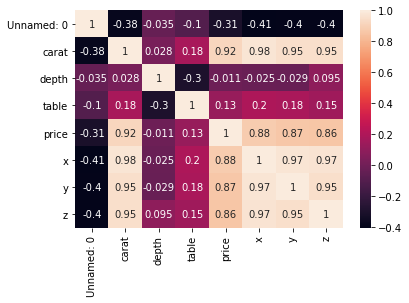

In [13]:

sns.heatmap(df.corr(),annot=True)

**price has high corr wit x,y,z**,**carat** **bold text**

In [14]:
# Drop non-useful ccolumns
df.drop(columns='Unnamed: 0',inplace=True)




```
# This is formatted as code
```drop unnecesay col
missing val categ
outlilers and scaling



In [15]:
df



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
#before doing anymore split
X=df.drop(columns='price')
y=df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
#install imp libaries
!pip install feature-engine

In [18]:
#replace mv with mean , median and cons......if there is skewnees repplace with median


In [19]:
imputer= MeanMedianImputer()


In [20]:
#replace cat missing with somethin

cat_imp=CategoricalImputer()


In [21]:
#rare encoding

rare_enc=RareLabelEncoder()


In [22]:
#ctegorical encoding

In [23]:
#Categoricl encoder



In [24]:


cat_encoder=OrdinalEncoder()


In [26]:
capper=Winsorizer(capping_method='iqr',tail='both')

In [27]:
scaler=StandardScaler()

In [30]:
transformers=make_pipeline(imputer,cat_imp,rare_enc,cat_encoder,capper,scaler)

In [31]:
#learn
transformers.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable cut is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable color is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.6/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable clarity is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)


Pipeline(memory=None,
         steps=[('meanmedianimputer',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['carat', 'depth', 'table', 'x',
                                              'y', 'z'])),
                ('categoricalimputer',
                 CategoricalImputer(fill_value='Missing',
                                    imputation_method='missing',
                                    return_object=False,
                                    variables=['cut', 'color', 'clarity'])),
                ('rarelabelencoder',
                 RareLabelEncoder(max_n_categories=None...
                                  variables=['cut', 'color', 'clarity'])),
                ('ordinalencoder',
                 OrdinalEncoder(encoding_method='ordered',
                                variables=['cut', 'color', 'clarity'])),
                ('winsorizer',
                 Winsorizer(capping_method='iqr', fold=3,
                 

In [32]:
#apply on train and test
X_train=transformers.transform(X_train)
X_test=transformers.transform(X_test)

In [34]:
#export to pickle
with open ('diamond_transformers.pkl','wb') as name:
  pickle.dump(transformers,name)

In [35]:
#!pip install catboost

     |████████████████████████████████| 65.8MB 59kB/s 


In [37]:

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [38]:
algorithms = []
algorithms.append(('ElasticNet', ElasticNet()))
algorithms.append(('AdaBoost', AdaBoostRegressor()))
algorithms.append(('RandomForest', RandomForestRegressor()))
algorithms.append(('GradientBoosting', GradientBoostingRegressor()))
algorithms.append(('KNeighbors', KNeighborsRegressor()))
algorithms.append(('LSVR', LinearSVR()))
algorithms.append(('SSVR', SVR()))
algorithms.append(('NSVR', NuSVR()))
algorithms.append(('DecisionTree', DecisionTreeRegressor()))
algorithms.append(('MLP', MLPRegressor()))
algorithms.append(('XGB', XGBRegressor()))
algorithms.append(('LGBM', LGBMRegressor()))
algorithms.append(('CatBoost', CatBoostRegressor()))

In [46]:
names =[]
train_rmse=[]
test_rmse=[]
train_r2=[]
test_r2=[]
thime=[]
import time

In [47]:
for name, reg in algorithms:
  t1=time.time()
  reg.fit(X_train,y_train)
  train_rmse.append(sqrt(mean_squared_error(y_train,reg.predict(X_train))))
  test_rmse.append(sqrt(mean_squared_error(y_test,reg.predict(X_test))))
  train_r2.append(r2_score(y_train,reg.predict(X_train)))
  test_r2.append(r2_score(y_test,reg.predict(X_test)))
  names.append(name)
  t2=time.time()
  thime.append(t2-t1)
 
reg_comparison = pd.DataFrame({'Algorithm': names, 
                               'Train RMSE': train_rmse,
                               'Test_RMSE': test_rmse,
                               'Train r2 score': train_r2,
                               'Test r2 score': test_r2,'TimeTaken':thime,})
reg_comparison.sort_values(by=['Test_RMSE'])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[16:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.074492
0:	learn: 3745.7953183	total: 8.99ms	remaining: 8.99s
1:	learn: 3503.4568969	total: 16.7ms	remaining: 8.33s
2:	learn: 3279.4979803	total: 23.9ms	remaining: 7.95s
3:	learn: 3078.9589797	total: 31ms	remaining: 7.72s
4:	learn: 2886.4613605	total: 38.3ms	remaining: 7.61s
5:	learn: 2712.1157768	total: 45.2ms	remaining: 7.49s
6:	learn: 2549.1084571	total: 52ms	remaining: 7.38s
7:	learn: 2399.6197082	total: 59.5ms	remaining: 7.38s
8:	learn: 2260.8739465	total: 66.9ms	remaining: 7.36s
9:	learn: 2134.5384558	total: 74.3ms	remaining: 7.36s
10:	learn: 2014.3492653	total: 81.8ms	remaining: 7.35s
11:	learn: 1904.6293965	total: 89.2ms	remaining: 7.34s
12:	learn: 1802.8774369	total: 96.6ms	remaining: 7.33s
13:	learn: 1709.9784174	total: 104ms	remaining: 7.32s
14:	learn: 1626.1802579	total: 111ms	remaining: 7.3s
15:	learn: 1550.8680606	total: 119m

,Algorithm,Train RMSE,Test_RMSE,Train r2 score,Test r2 score,TimeTaken
12,CatBoost,422.755303,525.561717,0.988865,0.982289,7.796242
11,LGBM,474.245259,531.323254,0.985988,0.981899,1.068397
2,RandomForest,206.726874,545.229437,0.997337,0.980939,19.096481
3,GradientBoosting,646.051293,644.413591,0.973997,0.973373,4.494593
10,XGB,655.852265,652.870418,0.973202,0.972670,1.867996
8,DecisionTree,9.078656,757.533305,0.999995,0.963205,0.280154
4,KNeighbors,652.154496,802.688664,0.973503,0.958687,4.338763
9,MLP,977.675925,936.588210,0.940449,0.943755,33.422401
1,AdaBoost,1243.540729,1233.817383,0.903658,0.902391,3.013815
5,LSVR,1578.056086,1546.251027,0.844854,0.846698,0.035853


## Algo
* Linear (ElasticNet)
* support vector(SVC,Linear SVC,Nusvc)
* Tree (DT,RF,ADABOOST,XGBBOOST,CATBOOST,LIGHTGBM)
* Distance(nn,knn)
* bayesian (Guassian, mUltinomial, Bernoulii)
* Neural Networks (MLPR)